# Dataset Statistics

In [6]:
import sum_real_data_exp_funcs
import one_to_n
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import collections

## Amazon - Google

5
2


 Amazon Product Count:  1345


 Google Product Count:  3021


 Amazon Product Max Match Count:  5


 Google Product Max Match Count:  2




 Number of Matches in Amazon-Google:  1300


 Number of Matches grouped by 1-N :  0




 Amazon-Google match ratio (1's table (amazon) / len(perf_match_ratio)):  0.966542750929368


 Amazon-Google match ratio grouped by 1-N (1's table (amazon) / len(perf_match_ratio)):  0.0


 Amazon Product Match Count Distribution


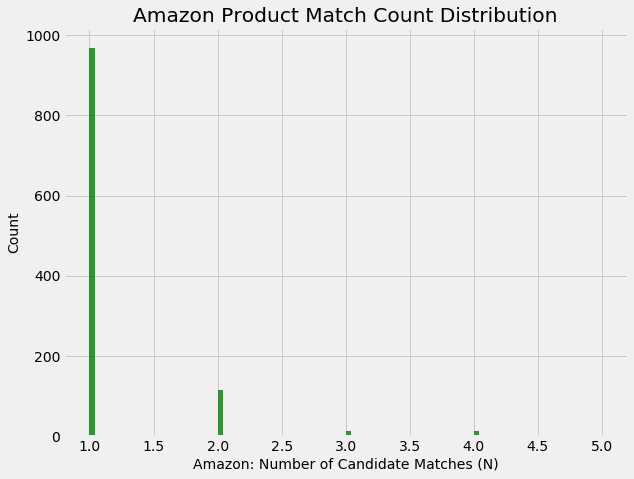

Amazon Outcome {1, 2, 3, 4, 5}




 Google Product Match Count Distribution


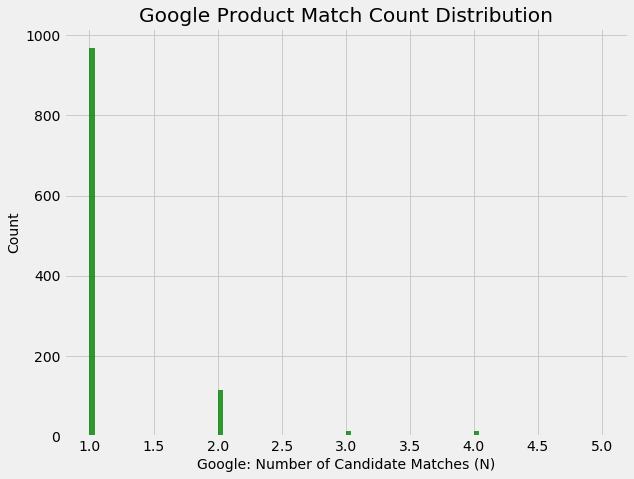

Google Outcome {1, 2, 3, 4, 5}


In [21]:
# number of rows in left table, rows in right table
table_amazon, table_google, tables_map, amazon_map, google_map, name_to_id_dict_amazon, name_to_id_dict_google = sum_real_data_exp_funcs.data_to_df('../Amazon-GoogleProducts/Amazon.csv', '../Amazon-GoogleProducts/GoogleProducts.csv')
amazon_product_count = len(amazon_map)
google_product_count = len(google_map)

# number of matches
perf_matching_df = one_to_n.lat_convert_df('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')
perf_match_count = len(perf_matching_df)

#number of unique matches
perf_matching_df = one_to_n.lat_convert_df('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')
perf_match_records_1 = perf_matching_df.to_records(index=False)
result_perfmatch = list(perf_match_records_1)

perf_match_dict = collections.defaultdict(list)

name_to_id_dict = collections.defaultdict(list)

for val1,val2 in result_perfmatch:
    if val1 in perf_match_dict:
        perf_match_dict[val1].append(val2)
        
unique_lefttable_perf_match_count = len(perf_match_dict)

# number of matches (from perfect matching dataset) / 1’s table length. 

match_ratio = perf_match_count / amazon_product_count

# number of matches (from perfect matching dataset) / 1’s table length. Grouped by 1-n

unique_lefttable_match_ratio = unique_lefttable_perf_match_count / amazon_product_count

# Distribution of 1-n matches for both google (left) and amazon (right) products

def amazon_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map
    
def google_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map

def produce_histogram(outcome_array, histogram_save_name, x_name, title):
    plt.figure(figsize=(9,7))
    plt.hist(outcome_array, bins=100, alpha=0.8, color='green')
    plt.xlabel(x_name, size=14)
    plt.ylabel("Count", size=14)
    plt.title(title)
    plt.savefig(histogram_save_name)
    plt.show()
        
# max number of matches for any single one
max_amazon_prod_match_count = sum_real_data_exp_funcs.find_max_n_amazon('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')
max_google_prod_match_count = sum_real_data_exp_funcs.find_max_n_google('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')



print("\n\n Amazon Product Count: ", amazon_product_count)
print("\n\n Google Product Count: ", google_product_count)

print("\n\n Amazon Product Max Match Count: ", max_amazon_prod_match_count)
print("\n\n Google Product Max Match Count: ", max_google_prod_match_count)

print("\n\n\n\n Number of Matches in Amazon-Google: ", perf_match_count)
print("\n\n Number of Matches grouped by 1-N : ", unique_lefttable_perf_match_count)

print("\n\n\n\n Amazon-Google match ratio (1's table (amazon) / len(perf_match_ratio)): ", match_ratio)
print("\n\n Amazon-Google match ratio grouped by 1-N (1's table (amazon) / len(perf_match_ratio)): ", unique_lefttable_match_ratio)

outcome_amazon, n_counter_map_amazon = amazon_distribution('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')
outcome_google, n_counter_map_google = google_distribution('../Amazon-GoogleProducts/Amzon_GoogleProducts_perfectMapping.csv')

print("\n\n Amazon Product Match Count Distribution")
produce_histogram(outcome_amazon, "amazon_stat_hist.png", "Amazon: Number of Candidate Matches (N)", "Amazon Product Match Count Distribution")
print("Amazon Outcome", set(outcome_amazon))
print("\n\n\n\n Google Product Match Count Distribution")
produce_histogram(outcome_google, "google_stat_hist.png", "Google: Number of Candidate Matches (N)", "Google Product Match Count Distribution")
print("Google Outcome", set(outcome_google))

## DBLP - Scholar

20
4


 DBLP Entry Count:  2521


 Scholar Entry Count:  63188


 DBLP Max Entry Match Count:  20


 Scholar Max Entry Match Count:  4




 Number of Matches in DBLP-Scholar:  5347


 Number of Matches grouped by 1-N :  0




 DBLP-Scholar match ratio (1's table (dblp) / len(perf_match_ratio)):  3.9754646840148697


 DBLP-Scholar match ratio grouped by 1-N (1's table (dblp) / len(perf_match_ratio)):  0.0


 DBLP Product Match Count Distribution


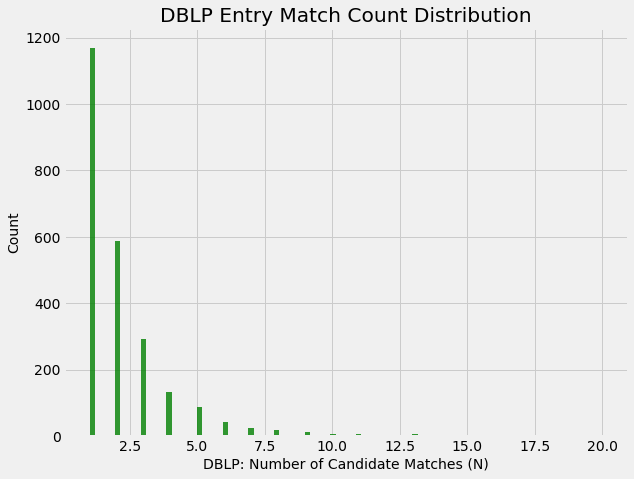

DBLP Outcome {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20}




 Scholar Product Match Count Distribution


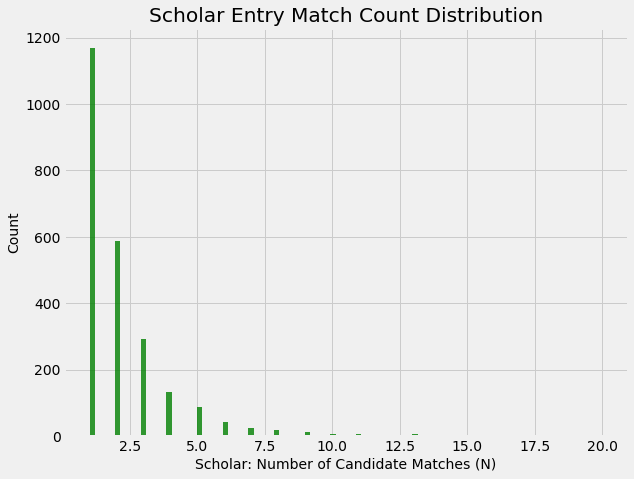

Scholar Outcome {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20}


In [27]:
# number of rows in left table, rows in right table
table_dblp, table_google, tables_map, dblp_map, scholar_map, name_to_id_dict_dblp, name_to_id_dict_scholar = sum_real_data_exp_funcs.data_to_df('../DBLP-Scholar/DBLP1.csv', '../DBLP-Scholar/Scholar.csv')
dblp_product_count = len(dblp_map)
scholar_product_count = len(scholar_map)

# number of matches
perf_matching_df = one_to_n.lat_convert_df('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')
perf_match_count = len(perf_matching_df)

#number of unique matches
perf_matching_df = one_to_n.lat_convert_df('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')
perf_match_records_1 = perf_matching_df.to_records(index=False)
result_perfmatch = list(perf_match_records_1)

perf_match_dict = collections.defaultdict(list)

name_to_id_dict = collections.defaultdict(list)

for val1,val2 in result_perfmatch:
    if val1 in perf_match_dict:
        perf_match_dict[val1].append(val2)
        
unique_lefttable_perf_match_count = len(perf_match_dict)

# number of matches (from perfect matching dataset) / 1’s table length. 

match_ratio = perf_match_count / amazon_product_count

# number of matches (from perfect matching dataset) / 1’s table length. Grouped by 1-n

unique_lefttable_match_ratio = unique_lefttable_perf_match_count / amazon_product_count

# Distribution of 1-n matches for both dblp (left) and scholar (right) products

def dblp_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map
    
def scholar_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map

def produce_histogram(outcome_array, histogram_save_name, x_name, title):
    plt.figure(figsize=(9,7))
    plt.hist(outcome_array, bins=100, alpha=0.8, color='green')
    plt.xlabel(x_name, size=14)
    plt.ylabel("Count", size=14)
    plt.title(title)
    plt.savefig(histogram_save_name)
    plt.show()
        
# max number of matches for any single one
max_dblp_prod_match_count = sum_real_data_exp_funcs.find_max_n_amazon('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')
max_scholar_prod_match_count = sum_real_data_exp_funcs.find_max_n_google('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')



print("\n\n DBLP Entry Count: ", dblp_product_count)
print("\n\n Scholar Entry Count: ", scholar_product_count)

print("\n\n DBLP Max Entry Match Count: ", max_dblp_prod_match_count)
print("\n\n Scholar Max Entry Match Count: ", max_scholar_prod_match_count)

print("\n\n\n\n Number of Matches in DBLP-Scholar: ", perf_match_count)
print("\n\n Number of Matches grouped by 1-N : ", unique_lefttable_perf_match_count)

print("\n\n\n\n DBLP-Scholar match ratio (1's table (dblp) / len(perf_match_ratio)): ", match_ratio)
print("\n\n DBLP-Scholar match ratio grouped by 1-N (1's table (dblp) / len(perf_match_ratio)): ", unique_lefttable_match_ratio)

outcome_dblp, n_counter_map_dblp = dblp_distribution('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')
outcome_scholar, n_counter_map_scholar = scholar_distribution('../DBLP-Scholar/DBLP-Scholar_perfectMapping.csv')

print("\n\n DBLP Product Match Count Distribution")
produce_histogram(outcome_dblp, "dblp_stat_hist.png", "DBLP: Number of Candidate Matches (N)", "DBLP Entry Match Count Distribution")
print("DBLP Outcome", set(outcome_dblp))
print("\n\n\n\n Scholar Product Match Count Distribution")
produce_histogram(outcome_scholar, "scholar_stat_hist.png", "Scholar: Number of Candidate Matches (N)", "Scholar Entry Match Count Distribution")
print("Scholar Outcome", set(outcome_scholar))

## Abt - Buy

1
2


 Abt Entry Count:  1081


 Buy Entry Count:  1079


 Abt Max Entry Match Count:  20


 Buy Max Entry Match Count:  4




 Number of Matches in Abt-Buy:  1081


 Number of Matches grouped by 1-N :  0




 DBLP-Scholar match ratio (1's table (dblp) / len(perf_match_ratio)):  0.803717472118959


 DBLP-Scholar match ratio grouped by 1-N (1's table (dblp) / len(perf_match_ratio)):  0.0


 DBLP Product Match Count Distribution


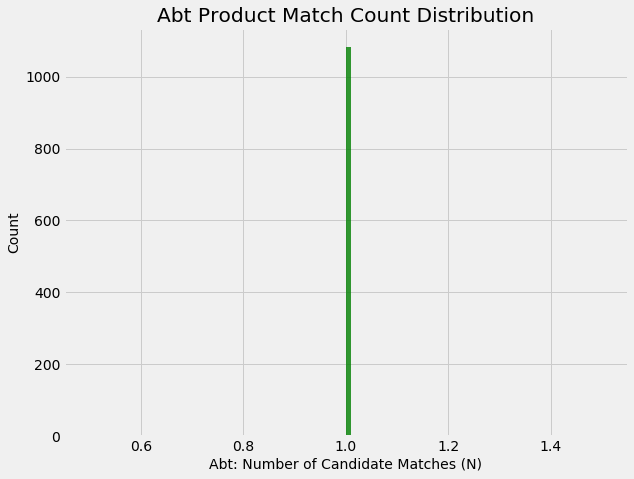

Abt Outcome {1}




 Scholar Product Match Count Distribution


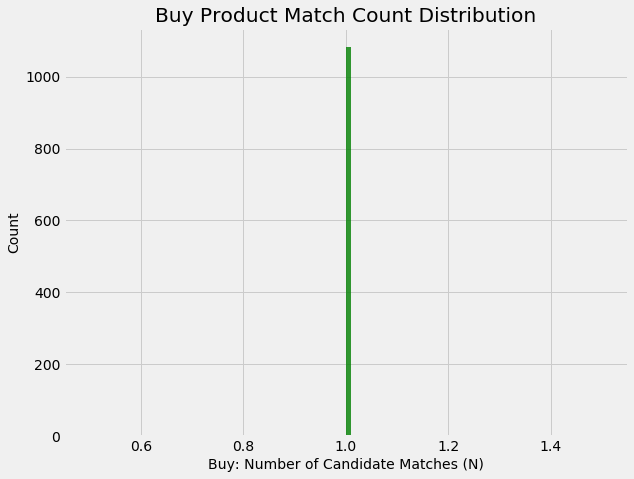

Buy Outcome {1}


In [26]:
def data_to_df(file1, file2):
    table_a = one_to_n.lat_convert_df(file1)
    table_b = one_to_n.lat_convert_df(file2)

    # Keep track of table 1 and table 2 items
    records1 = table_a.to_records(index=False)
    result_1 = list(records1)

    records2 = table_b.to_records(index=False)
    result_2 = list(records2)

    joined_list = result_1 + result_2
    tables_map = {}

    data1_map = {}
    data2_map = {}

    for (col1,col2,col3,col4) in result_1:
        data1_map[col2] = col4

    for (col1,col2,col3,col4) in result_2:
        data2_map[col2] = col4

    for (col1,col2,col3,col4) in joined_list:
        tables_map[col2] = col4
    name_to_id_dict_1 = {}
    name_to_id_dict_2 = {}

    for (col1,col2,col3,col4) in result_1:
        name_to_id_dict_1[col2] = col1

    for (col1,col2,col3,col4) in result_2:
        name_to_id_dict_2[col2] = col1

    return table_a, table_b, tables_map, data1_map, data2_map, name_to_id_dict_1, name_to_id_dict_2



# number of rows in left table, rows in right table
table_abt, table_buy, tables_map, abt_map, buy_map, name_to_id_dict_abt, name_to_id_dict_buy = data_to_df('../Abt-Buy/modified_abt.csv', '../Abt-Buy/modified_buy.csv')
abt_product_count = len(abt_map)
buy_product_count = len(buy_map)

# number of matches
perf_matching_df = one_to_n.lat_convert_df('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')
perf_match_count = len(perf_matching_df)

#number of unique matches
perf_matching_df = one_to_n.lat_convert_df('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')
perf_match_records_1 = perf_matching_df.to_records(index=False)
result_perfmatch = list(perf_match_records_1)

perf_match_dict = collections.defaultdict(list)

name_to_id_dict = collections.defaultdict(list)

for val1,val2 in result_perfmatch:
    if val1 in perf_match_dict:
        perf_match_dict[val1].append(val2)
        
unique_lefttable_perf_match_count = len(perf_match_dict)

# number of matches (from perfect matching dataset) / 1’s table length. 

match_ratio = perf_match_count / amazon_product_count

# number of matches (from perfect matching dataset) / 1’s table length. Grouped by 1-n

unique_lefttable_match_ratio = unique_lefttable_perf_match_count / amazon_product_count

# Distribution of 1-n matches for both abt (left) and buy (right) products

def abt_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map
    
def buy_distribution(perf_match_file):
    data_table = one_to_n.lat_convert_df(perf_match_file)
    records1 = data_table.to_records(index=False)
    result_1 = list(records1)
    n_counter_map = {}
    for (col1,col2) in result_1:
        if col1 in n_counter_map:
            n_counter_map[col1] += 1
        else:
            n_counter_map[col1] = 1
    outcome = []
    for key, val in n_counter_map.items():
        outcome.append(val)
    return outcome, n_counter_map

def produce_histogram(outcome_array, histogram_save_name, x_name, title):
    plt.figure(figsize=(9,7))
    plt.hist(outcome_array, bins=100, alpha=0.8, color='green')
    plt.xlabel(x_name, size=14)
    plt.ylabel("Count", size=14)
    plt.title(title)
    plt.savefig(histogram_save_name)
    plt.show()
        
# max number of matches for any single one
max_abt_prod_match_count = sum_real_data_exp_funcs.find_max_n_amazon('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')
max_buy_prod_match_count = sum_real_data_exp_funcs.find_max_n_google('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')



print("\n\n Abt Entry Count: ", abt_product_count)
print("\n\n Buy Entry Count: ", buy_product_count)

print("\n\n Abt Max Entry Match Count: ", max_dblp_prod_match_count)
print("\n\n Buy Max Entry Match Count: ", max_scholar_prod_match_count)

print("\n\n\n\n Number of Matches in Abt-Buy: ", perf_match_count)
print("\n\n Number of Matches grouped by 1-N : ", unique_lefttable_perf_match_count)

print("\n\n\n\n DBLP-Scholar match ratio (1's table (dblp) / len(perf_match_ratio)): ", match_ratio)
print("\n\n DBLP-Scholar match ratio grouped by 1-N (1's table (dblp) / len(perf_match_ratio)): ", unique_lefttable_match_ratio)

outcome_abt, n_counter_map_abt = abt_distribution('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')
outcome_buy, n_counter_map_buy = buy_distribution('../Abt-Buy/modified_perfect_mapping_abt_buy.csv')

print("\n\n DBLP Product Match Count Distribution")
produce_histogram(outcome_abt, "abt_stat_hist.png", "Abt: Number of Candidate Matches (N)", "Abt Product Match Count Distribution")
print("Abt Outcome", set(outcome_abt))
print("\n\n\n\n Scholar Product Match Count Distribution")
produce_histogram(outcome_buy, "buy_stat_hist.png", "Buy: Number of Candidate Matches (N)", "Buy Product Match Count Distribution")
print("Buy Outcome", set(outcome_buy))